In [1]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

data_dir = '/content/content/MyDrive/data/Unsupervised learning'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['Online Retail.xlsx', 'Online Retail.csv', 'df_train.csv', 'dbscan1.jpg']

# __Introduction to DBScan__
- DBSCAN clusters data based on density without requiring a predefined number of clusters.  
- Uses Epsilon (ε) and Min_samples to determine cluster boundaries and identify core points.  
- Effectively separates dense clusters from sparse areas while detecting noise and anomalies.  
- Handles irregularly shaped datasets better than K-Means, which assumes uniform cluster distribution.  
- Ideal for fraud detection, geospatial analysis, and customer segmentation in various applications.  
- Preferred for complex clustering scenarios where traditional methods struggle with non-linear patterns.  


<img src="data:image/png;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAFWAiEDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivin4L/Gr9qj47fDpvHPhu1+EY0try8t4NLvrbU4bqX7PO8RUyCZkVm2HBwRyM4r6E/Zo+Odt+0T8B/C3xITTzocesQSvNZyyhxBJDNJDKA+Bld8TEEgfLjIHSgD1KiuQ8LfGDwH451i50nw3428OeINVts+fY6Vq1vczxY4O5EcsuPcVZ1/4neDvCdxqEGt+LND0afT7ZLy8j1DUoYGtoHYqksgdgURmVgGbAJBAPFAHTUVyvi/4r+CPh7FYy+KfGOgeGor7i0fWNUgtFuO/7syMN/4Zri/g18YdU+JHxL+LugXcWnjTPCWr2ljptxZK2+eGWzinLSMXZWO6Q4KhRjHB60AevUVx9j8Y/AOp+LpPCln448N3fiiMsr6JBq9u96pHUGAPvBHfitXW/HHhzwzfQ2WseINL0q9mt5buO3vr2OGR4YsebKqswJRNy7mHC7hkjNAG3RVLRNb07xLpFnqukX9rqul3kSz217ZTLNBPGwyro6kqykcgg4NfHPwR+M37Uvx68ADxt4ei+EVvpMl7eW0On6haapHcuIJ3iILrOyqWKcNggZzjtQB9p0V47+z/APtH6X8Y/gqvjzWYbfwc9jcXFhrdtfXieTp91BIY5VMxwpTOGDHHDCu+8FfErwj8SbSW78I+KtE8U2sLbZJ9F1GG8RD6Fo2YA/WgDpKK8x8DfEO7T/hY1/4v8W+CJdE0HWJ4obnRb7H9l2aIreXqTSNtiuFySw4ABB4rdHxl+H7eJbHw6PHPho+IL9EktNKGr2/2q4V13I0cW/c4ZSCCAcjkUAdjRXiXxK/a++G/wq+MHhr4fa94m0Sxv9Uju5L+6utYtoE0YxQxSxLdh3BjM6yjy92N2CRmvaLW6hvrWG5tpo7i3mQSRTRMGR1IyGUjggg5BFAEtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnB+x3+yrJ8Yv2Z5L9/jB8S/CdrqOpavbyaP4f1mK305FF5MjYiMJbDAEsN/JJ6Zqhr/AMR9S1f/AIJ9eLfDZks7Lw94S8dx+Ar/AFrQ4vsdtfaNFewI90oUkRrKsoVypIOW/vEV9NN/wTl/Z7Z5ifAtzsmkeSWEeItUETliS2Y/tO0gknIxg56V7Ro/wm8GeH/h6fAuneF9KtfBxt3tW0RLVPsrxPnerIRht2SWJySSSck0AfL37bvw98H/AA0+FXgPxF4E0DR/DvjTSPFOj23hWTR7aO2lleSdY2tk8sAyI8JkymcELk9Kdqnw28L/ABI/4KWa5F4q0Kx8RWunfDyzvLa01OET26T/AG2RBIYmyrMqu4BIO3cSMHmvafAv7IXwj+G/iiy8RaD4QSLVrDcLGa8v7q9Sx3DB+zRzyukHHH7tV446V3Fv8L/DNp8TLz4gxaZs8X3emJo82o/aJTvtEkMix+Xu8sYck7gu7tnFAHzR8HvCXh/x3+2t+0Q3jHSNP1nVtFj0Ww0W21W3SUWmmPaF2ECOCAjSElio68Hrg8B4Ght/Angj9t6L4XbbddLnmGlLpEpl+zSppS7khwTtMbhwqL9woFAAUCvq/wCKH7Mfwz+MniCz17xZ4YS+1y1h+zR6laXlxY3LQ5J8p5LeSNpI8knY5K8njmtr4cfBXwR8ITrA8HeHrbQI9XeGS8gtWfyXMUKwx7YyxVAI0VcIADjJBJJoA+ANT+Dni7Uf2L9AktdE+CHhDwra6TYapYeOo9Xv4r6ymXy3jvTKtjkTlz83zHLOw5r2T49eDNI+J37Y37NGleMNPs/EFhPoWtXN3ZTIWtbmRIYJF3xsBvTzFVtrjBwMjjFexJ+xN8E01yPVP+EEtiY7r7amnNe3Taas27dvFiZfswO4k/6vua9G1n4X+GfEHxA8O+N7/TPP8T+HoLm30y++0Sr9njnULMNgYI24KOWUkY4xQB0GmaXZaJp1vYadaQWFjbIIoLW1iWOKJBwFVVACgegr89v2I/hX8ZfF37PtvdeEvjjD4G8OT6vqqR6SnhC2vp4MXsokZbmSYHLHcwyh256HFfonXK/DT4X+Gfg94Ui8NeEdM/sjRIp5rhLX7RLNiSWRpJDukZm5dmOM4GcDAoA+OfiN8CvDnwm8f/sqfCK4abWfhpe69rd7rba66yrquqi1M1o1zkBXZ5nkwhGDgDBxXa/FLwzo/wAPP25PgFceB9Ns9G1nxBbazZ+IbXS4UhW702K2WSOS4RAB8koGxz1Py/NgAfSfxH+GPhX4u+GJfD3jHQ7TX9HkdZfs90p+SRfuyIwIZHGTh1IYZODzXO/C79nH4d/BrVL3VPCfh0Wer3sYhn1S9vLi/vHiBBEfn3EkkgTIB2hsZA4oA+OYv+SB/t6/9jLrv/pHHTf2lvhV4O+H3/BMCz8R+HPDOmaR4i0/TPDusW2sW9sovY7x7mzDz+eRvLkSONxJODjpivr/AFv4N/C3wt4K+I0GsWNrpPhnxlPcX/imW91OaGG5kmQJK7SNIPJBUAfIUA7YNfP/AMQfjL4H+Onw0ufhB8NfhNr3xm8JpDbaczQTz6Zo0a27RtCjag7K52NEh4PzbD8xBOajFy2IlOMd2dT8e/DGgX37bf7OIvtJ024fUbPxQLj7RbRsbpo7O02b8j5yoBxnOADivqeKJIIkiiRY40UKqIMBQOgA7CvjH4kfss/Gn9qiLSP+Fo+LfCvgiy064+2WVr4Q0+W4vrZiMEC7kdWjYjhjGSpwOCK7O1/YL0C+t4YvFXxM+JnjGONAgt9R8SSJbqAMALHGq7R+NVyxW8iOeT2j959PUV8z/wDDuT4Czc3nhS+1CTtJc69flgfXiYUh/wCCefwltPm0Y+KfDkw+5PpXiO7R4/8Ad3uw/Si0O7+7/ghep/Kvv/4B9M0V8yN+yp8RvB+JvAP7Q/jO2kT7lr4wSHXIGH9w7wpUdsjJHao3+KH7RnwiOfGvw40r4n6In3tU+H87x3yL6tZzcyN7R4HvT5L/AAsPaNfFFr8fyPp+ivJ/hB+1F8O/jZcSafoOtfZPEMBIuPDusRGz1KBh1DQvgtjuU3AZ5NesVm04uzNFJSV0wooopFBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFYvjbxJ/whvgzXtf+xy6j/ZWn3F99jt/9ZP5UbP5a/wC023A9zQJ6am1RXwl+yT/wUO8TfH/402ngvW/Cmk2tlqlvcXNrc6PNK8lkIoy+243khs7SNwC8soxX3bWlSnKm+WRlSqwrR5obBRRRWZsFFFFABRRXIfE74t+D/g14cfXfGev2egaauQr3L/PK392OMZaRv9lQTTSb0Qm0ldnX0V8Z+Jv2xPHvj/XdC0fwB4csfh3o+vtLHpni74krJbre7Nm421sgPPzrsMjYcsBgHIrrk/Ymk8dj7R8X/ij4v+I08vM2mQ3h0vSeeoW2gxj0yGGR2rV0nFJz0uYKsptqnrb+v60PW/FX7RPwu8DtImu/EPwzpk8ZIa3m1WHzge/7sNu/SvOr7/goR+z5p+fN+JFm+P8AnhY3cv8A6BCa7Hwn+yh8HPBCRjSPhp4aieMYSe406O5mH/bSUM/616PY+HtK0sAWemWdoF6CC3RMfkKn3PMr94+y/H/I8Hsf+ChH7PmoY8r4kWaZ/wCe9jdxf+hwivRfCv7RPwu8cNGmhfEPwzqc8hAW3h1WHzie37stu/SuzvvD2laoGF5plndhuont0fP5ivOPFn7KHwc8bpINX+GnhqV5Bh57fTo7aY/9tIgr/rR7nmH71dU/w/zPV68J+M/7Udr4J8T2/gLwLoz/ABD+KN6D5WgWMoWKxX/nteTdIUGQcHk5H3QQ1fMfiz4VXWgfGaH4Y/sx+NfF+iavZKJPEhk1trnQNCt2BCo0ciuzXB52qGyMf7xXrvhIfGf7CmkXWn+M/hhD4m8O3UzXGofEHwS0l7ezOWJMt9DL+9ON2SykIvOASedVTS138tjF1ZPS1u73PRPDn7Imo/EzVbbxV+0Fr48fa0hEtr4XtC8Og6WcfdSHOZm7F369CGxmvpbTNLs9F0+Cx060gsLG3QJDbW0axxxqOgVVAAHsK5r4Y/Fvwf8AGXw4mu+DNfs9f01sBntn+eJv7skZw0bf7LAGuvrGUpN2Z0QjFK8QoooqDQKKKKACiiigDy/4x/s1fD346wI3inQY31WHBtdbsW+z6hasOVaOdfm4IBAbK+1eNTeNPi1+yAufHElz8W/hLCVX/hKLaP8A4nejxk/eu4xn7RGo6yD5upJ6LX1rTXRZEZHUMjDBVhkEelaKdtHqjKVNN80dGY/g3xpoXxC8OWWv+GtVtda0a8TfBeWcgdGHp7EdCpwQeCAa2q+TviB8HvEn7MnizUPif8FtO+2+HrpvtHir4dQnZDdoB811ZKOI51H8AGGA4B+6foT4V/FPw38Z/A2meLfCl+uoaRfpuVukkTj70Ui/wup4I/LIIJJRsuZbBGbb5ZbnW0UUVmahRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFeLfFP9r/AOGPwn1c6He61Lr/AIpLbE8OeG7dtQv2f+4Uj4RuOjspril+LP7R/wATF3eDfhNo/wAP9Nl/1epeP9SZ5yv942luN8bD+6xPPtWihJq+xk6kU7LV+R9PUV8yj4CfH3xQM+Jv2iJNMhb71j4W8N29vt9ds7Ev+Yp3/DGGrXfN/wDtCfF+Q/8ATn4gS2H6RGjlj1kLnk9o/kfTFFfM5/Y88T2IzpX7RPxShkXlDqOpRXig+4ZBmmN8Lf2nPBo83QfjN4d8cJHylj4t8OLaKw/utNbEufrRyp7SDnkt4v8AA990DwF4Z8KX97faJ4d0nR72+bddXNhYxQSXB45kZFBY8DrnoK3q+YH/AGnfij8MMH4sfBTUotLT/WeIvA9yuq2yj++8HEkSDuWJ+lev/Cb4+/D/AOONg914K8UWOtmMbprRGMd1AP8AppC4DqMnGSuM9DRKElqxxnB6LR/cegUUUVmahRRXzT8cvjR4l8b+Pf8AhSvwfuVj8WyoH8ReKFXzIPDVo3U+huWHCrnIzng8rUYuTsRKSgrs0PjF+03f23i25+Gfwj0UeN/ieEH2nJI03Q1bjzb2UcAjr5YO49OCQGk+Fv7I+naN4lj8c/EvWJvih8SGw/8AamqqPsennHKWdt9yJQehxnuNuSK9A+CHwN8MfAPwamgeG7d2aR/Pv9Tum33eoXB+9NPJ1Zic+w6AAV6FVuVtIEKDk+af3dEfMH7bX7PXif462vhmfw61rjQrbUZ5o53Ikmd1gMcUYAOWYxMOSAOOa9G/ZX1Gz1X4EeFbmy1jUtZja22ySatMJZ4JVO2SEsADtRgwXPO3HbFes189eDh/wpD9o/V/CbHyfCnj4Sa1pA6JBqKD/SoR2G9cOO3CqK641JVqHsH9nVfr/n8jglRjh8V9ZX29H+Fvyt6tH0LRRRXnnqhXgH7Unxm1vw2NH+Gnw9Bufin4x3Q6eyjK6Va5xNfy8HCoN23PVgcA7SD7J428Y6X8PfB+s+Jtbn+zaTpNpJe3MnGQiKWIAPVjjAHckDvXgv7HvgzVfEY1/wCOPjKBovF/j0rJaWkgYHS9IU/6NbKG6bgFkYj72UPXOdIJL3n0MZttqEev5HqHwJ+Bvh/4BeBYfDuhiS6nkc3OpatdfNc6ldN/rJ5W5JYnoMnAwK9FooqG23dmqSirI+ffil+yPp2s+JZPHPw01ib4X/Ehcv8A2ppSj7HqBA4S8tvuSqT1OM9zuwBUfwd/abv7nxbbfDP4uaMPBHxPKH7Ngk6briLx5tlKeCT18sncOnJBC/Q1ee/G/wCBvhj4+eDX0DxJburRv59hqdq2y70+4H3ZoJOqsDj2PQgitFJPSZk4OPvQ/wCAz0Kivmn4G/GjxL4I8e/8KV+MFysni2JC/h3xQy+XB4ltF6H0Fyg4Zc5OM8nlvpaolFxdi4yU1dBRRRUlhX5t/scfF744eKv2xtb0XxbqGt3mnD+0P7e0i+3/AGLSthPkeQCu1fnCKMBdysTzX6NanqtlolhPfajeQWFlAu6W5upVjjjHqzMQAPrVXw54o0bxjpUWp6Bq9hrmmy/6u8025S4hf6OhIPUd+9awnyxkrXv+BhUpucotStbX1NSiiisjcK+RfiloE37HPxNf4ueFrS5f4Z6/cCPxx4fs03R2UjnCapDGOhDHEgUc598r9dVU1bSrPXtKvNN1C3jvLC8he3uLeUZSWN1KsrDuCCQfrVxlyvyM5x5lpuLpmp2mtabaahYXEd5Y3cKT29xCwZJY2AZWUjqCCCD71ar5a/ZZ1O9+CvxG8Tfs967cS3FrpMbaz4OvrjObnSZH5g3N954HbbxnjdjAUV9S0pR5XYcJcyuFFFFSWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV47+0L+0Nb/Bq003RtG0uXxb8RtfYw6D4YtD+8uH7yyn/lnCnVnOOhx0Yq0nJ2RMpKKuzovjP8dfCHwF8MprPiu/aLz38my060Tzry/mOAIoIgcu2SPQDIyRXiEXgv4z/tTt9p8aX998F/hzIT5XhjRp8a5qCZ4+1XGP3CsOsa88kMOhrq/gZ+zHNoOvn4kfFK+j8a/Fm9/eNfS5a00dT0t7KM8Iqg43gZPOMZOfoStLqGkd+/+Rlyyqay0Xb/ADOD+E/wL8CfBDR/7O8F+G7LRY2UCa4jTfcXHvLM2Xfp3P0xXeUUVm227s2SUVZBRRRSGFFFFABXjPxe/ZL+H/xe1Fdbnsbjwz4xiO+38VeG5jY6jE/OGMicOef4wfbFezUU03F3RMoqStJHyefiz8Vf2U5Bb/Fm1l+I3w3iOE8f6Jbf6dYR5AX7far1A7yJn33McV9OeF/FOkeNdAsdc0HUrbV9IvoxLbXlpIHjlU9wR+RHUEEHmtCeCO6gkhmjSWGRSjxuoZWUjBBB6givkzx58IvEX7J+vXvxI+DNk174Ncm48T/DlZCsDxjl7qwB4ilUAkoOCBgDgLWuk/JmXvU/Nfiv8z0z9qD426l8LfDmk6D4Qt4tT+Jfi65/svw5p8hG0SEfvLmTPHlwqQxJ4yVB4yRt/s7fAvTvgJ8PodGimGp69eSNfa5rcgPnalfOd0kzk84ySFB6D3JJ8a/ZMuF/aN+Jniz9oPUhvsmkk8PeELGVwXsLCM/vZHQEhJZWIJ5yAWH3SM/WtKfurk+8Ie+/aP5f15hRRRWRuFeVftJfDi8+IXw5kl0RjD4r0GdNZ0SdB8y3UJ3BR/vDK88ZIPavVaK0pzdOSnHoZVacasHTlszj/hH8RrP4s/DrRPFNkBGL6AGaAHmCZflljP8AuuGHuMHvXYV88+BIz8Ef2ita8GN+58K+OBJreijBCQ3yD/SoF4wNyjeB0AVR1NfQ1aV4KErx2eq9P+BsZYapKpC0/iWj9V/nv8z5c/a5kn+K/wAQvhn8CrNibHxFeHW/EwRypGk2jB/LYjOBLINo4+8g6CvqCGGO2hjhhjWKKNQiRoAFVQMAADoBXzJ+zmg+I37THx1+JEv76DT76HwVpUnURRWqh7pVPcNMyN9a+nqielo9jSnreff9Aoory39qD4m6z8G/gH4z8ZeH7BdS1jSrMSW8MiFkUtIiGRgCMrGHMhGeiGs0ruyNJNRTbPUqK+E/+Ce37WHxG+OPjzxR4Z8Z6ja+KLKz01NTh1q1so7b7NIZVT7MwjVVO4MxXI3fu2yew+7K0qU5UpOEtzOjVjXgqkNmeX/tE/AvTvj38PptGlmGma9ZyLfaHrcYPnabfId0cyEc4yAGA6j3AIxP2X/jbqXxS8OatoHi+3i0z4l+Ebr+y/EenxkbTIB+7uY8ceXMoLAjjIYDjBPtdfK37T9jP8CPil4V/aA0aJl06B49B8bQRZIn0yV1WO4KDq8Lkc5yfkHQGiPvLkfyFP3H7RfP+vI+qa8w+Ff7TPwz+NnirxL4b8FeKYtc1rw5IY9TtktZ4vJIdoyVaRFWRdyMN0ZYdOcMM5X7Wfxsg+B37NfjXx1bXafaYNNMelzRtuD3U+I7dlx94b3VuP4QTnHNfmP+yx428Afs6fG39nHWPDPi2w1e58W6LL4f8cW1pPvkt7y5uPOhab3WSeCMsMjbaH1ycjc/S79sD9nu9/aX+D7+EtO1tNDvYr+HUIpJ0Z4JjGGHlShedh354zgqpwa5P9h79lHWf2XfDfiaPX9cstT1LX7mGeSz0lHFlaeWrD92XALFt5ydq8KvHFfTVFae0koez6GLpQdT2ttQorzz9oT4rSfA/wCDPinxzDpT63No9sJksUYr5jM6oCxAOFUvuY4+6pr5+/Yh/bc8RftNeMPEPhvxF4d0yyn0+xGpRajokkht9hkVBDIHLESYcHIPOx+BQqcpRc1sglVhGapt6s+xKKKKzNj5l/bg0S/8MeHPC/xl8PW/meIvhzqK38qocNc6ZKRHeQH1BUhuSMBXI5PP0bomsWfiLRrDVdPmW5sL63jureZekkbqGVh9QQaj8RaBZeKvD+p6JqUIuNO1K1ls7mE9HikQo6/irEV4H+wVrl5L8B/+ES1WYzaz4F1i+8LXZbhv9HlPl8dgI3jUf7ta/FD0Mfhqev5r+vwPo2iiisjYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDzf4//ABv0j4BfDq88Sakj3t67C00rSoAWn1G9fIigjUckk8nAOFBODjB4j9mj4Can4Tub74k/EW5XW/i34miV7+6Yfu9LgOCtjbDnYicBsfeI6kAE8Z8Ix/w1T+0JqfxXuyt18PfBE0ui+DrdiGjurwY+1ahtI/3VQ+gB4K19ZVrL3Fyrfr/kYR/ePne3T/MKKKKyNwooooAKKKKACiisHX/Hvhnwpf2VjrfiLSdHvb5ttrbX99FBJcHniNXYFjwemeho3FexvUUUUDCvnb9uTxXqVp8IrXwN4enMPij4hanb+GLFlzmNJm/0iQ4x8oiDgnPG8V9E18w+InT4j/8ABQDwrpZZZLL4e+FLnV2VjkC8vHEAGPURbWz2rSn8V+xjV+Hl76HIeL/hi/7Cmr6d8Rvh9Hdz/DQx21h418NRr5hESKI11SFRgCVcAyYADZJ4BJX6+0HXtO8U6JYaxpF5DqGl38CXNrdwNujmicBlZT3BBBqzeWdvqNpPa3UEdzazo0UsEyB0kRhhlZTwQQSCDXyz+z1dz/s6fGvWvgJqlw7+GtRSXX/AtxM+4rbElrix9jEwd1z1UMT1Aqm/aK73RKXspWWz/B/8H8z6sooorE6AooooA8m/aX+HV/47+HL3mgfu/F/h2dNa0WZVDP8AaITu8sZ671BXB4yVz0roPh/8WNL8efCTT/HkJWOxm09ry4jVs+Q6KfOjJ9VZWXPtmu5r48+IV6fgDefGbwjJ+58L+LfDOr+JNBPRIbxLSQ3luv1wJABwBgdTXZTXtqbp9Y6r06r9fvPPqv2FZVektH6/Zf6fcdn/AME9tHlsf2W/Dmq3QP8AaPiG6vdbu2JJ3STXMm08+qLHX0hXk37JVl9g/Zg+FUWMbvDVhL/33Aj/APs1es1zTd5tnZSVoRXkFRzwR3MMkM0ayxSKUeN1DKykYIIPUGpKKg0MPwp4F8N+BLWe28NeHtK8O208nmyw6VZRWqSP/eYRqAT7mtyiijcSVtgrD8c+DtO+IXg3W/DGrx+bpmr2ctjcKACQkiFSVyCNwzkHHBANblFGwNX0Pz78JfAXVv2uPgN4d+E3izxm+iv8KfFcmmeIbEWJnfV4rY7bZQ/nJ5aGB2UMQ+SAwHy8+w/tEf8ABPX4YfGX4dNoPhbw94b+F2vR3kN5a+I9A8O28c8JQnKkReUzKykjG8AHa3JUVieLPFZ/Zz/a58aa0lvBfab440PTrt7BbnyZDd27SwlwNpBxGuT6lvY19SeDfFdp438MafrliHW2vELKkn3lIJVlPuGBH4Vg8VRqYiVCMveSvbXb8nrpodMcHiKeFjiJx9xvlTut/PqtNdd1qXNCtL2w0PTrXUb1dS1CC2jjub1IfKW4lCgPIE3NtDEE7dxxnGT1rxX4Wftp/DX4wfFnVPh74fudQbWrLzvKuLm1Edre+S2JPIfcS2OT8yrkAkZr3ivlL4F/8E+/DXwN+N0/j+z8RXep21v9q/sbRZbVI003z8h/3gY78IzIMKvDc5rsgoWlzb9DgqOopR5Fp19D6pngiuoJIZo0mhkUo8cihlZSMEEHqCO1ZPhjwT4d8E289v4d0HTNAgnkMssWl2cdssjkklmCKATkk5Pqa2qKyNrBRRRQMK+Y/gDEvhH9rv8AaH8MrlLbUH0rxFaoWJyZoGW4bn/ppivpyvmfSv8AQf8AgozrsHT7d8NILrHrs1Ex5/WtIbSXkY1N4vzPpiiiiszYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvAP21viHq3hH4Qp4c8Mbm8Y+Ob6LwxpCxnDI9xlZJfYLHv+bICllORXv8AXzDfp/wtX9vmytZT52j/AAx8NG8EZ5VdTvztUkdP+PcZHcEZFaQ3u+hlVb5bLroe6/C74eaX8Jvh54f8H6Mm3TdGs0tI2IwZCB80jf7TsWY+7GupooqG76s0SSVkFFFFIYUUUUAFcj40+MHgP4b3MFv4t8beHfC1xcDdDFrWrQWbSD1USOpPQ9PStvxPq7eH/DeraokJuGsbSW5EI6uUQtt/HGK/Oj/gnp+zZ4H/AGnPhp4l+MHxc0qD4g+MfE2uXIkm1R3dLWOPaAiLuwvJOPRQirgDkA/R/StWsdd06C/029t9RsLhd8N1aSrLFIvqrKSCPpXw7+1t/wAE8fE3x/8AjTd+NNE8V6Ta2WqW9vbXVtrEMryWQijCbrfYCGztB2kryzHNe0fsrfsuaT+y9q/jnTfDXjK61XwxrF4t5aeGLjDLoxBfcEfezNuDIpLAE+WucnmvoWtKdSVN80TKrShWjyzWhi+CfDf/AAhvgzQdA+2S6j/ZWn29j9suP9ZP5Uap5jf7Tbcn3NbVFFZmi00Cvmb9mof8JF+0p+0l4pf5s6zp+hRZ/gFpa7XA+pcGvpmvmf8AYs/f6x+0FcvxK3xR1eEg9dqLCFP5GtI/DIyn8cf66H0xXz1+2z4G1LVvhZb+OvDUZPjT4e3ieJNKZBlnSLBuYTzyjxBiV5LbFGDnFfQtMmhjuYZIZo1likUo8bgFWUjBBB6g1MXyu5pKPNFo5/4c+ONP+JngLw94s0s50/WbGG+hBOSgkQNtPupJU+4NdHXzJ+w+8ng3T/iV8Jp5GceAvE9xbaeshyy6bc/v7XOfXdJX03TmuWTSJpy5opsKKKKg0CvDP2zPhRB8U/gVrwA2ano0Eup2ki53EJG3nRcckSRF1x0J2k9K9zrzz48a9rPh74dXs+i2IvppmFvODEZBHCwYO+0dew/4FmoniVg4vEPaOumpcMG8wksIrXnprpv5mL+yPqMGo/sz/DcQTi4W00W3sGcf34F8lh+BjNeu18u/sGaI/hzwh4r06zupJ/D8Oop9khZ/MFtL5Y82PcSSTgREg/3gepJP1FSp4ili4qvQvyy1V1Z/P0+7toOpha+Ck8Nibc8dHZ3Xqn5791s7MKKKK0MwooooAKKKKAPkL9uTwTB4r+IXwWtJJf7Pj1zVp9Dl1GFMzwyPFvtnU56LIrZHcM3Q4I9A+AfxLufDF/D8I/HGnw6B4v0uHFhNFkWmt24z+/gY9XPJZeudxwMMq4n7af7jWP2fblOZV+KGkQgDrtdZgx/SvXPjD8HtH+MfhpNP1B5bDUrST7Tpes2ny3On3AwVkjYYOMgZXIzgdCAR0wVJJKcd769V/wAB6XXXfc4qrruTlSltbS+jsuvmtbPpe2x3lFeIfB74wazbeJG+GvxLSOw8d2ibrO/QbbbXbcdJ4TgDfgfMnB4JwMMq+31nUpypy5Zf8Ob0qsa0eaPzXVPswooorI2CiiigAr5n0I/2h/wUU8Tzj5hp/wAOrWzJH8Je/MuP619MV8x/s3SHxd+09+0d4v2MbaLU9P8ADds5wQps7crOoIJ6uynHuOlaQ2k/IxqbxXn+h9OUUUVmbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8x/sZxnxH4u+PfjqR2kfWfHNzpsLnHz21kixQkHGcYdh17fXP05XzP8A8E7B9o/Zf0nUuranquqXhbuxN7MuT6/drSOkJP0MZa1Ir1/r8T6YooorM2CiiigAooooAa6LIjI6hlYYKkZBHpXwro37Gfx0/Zu8ReJYf2dviH4YsfA+vXragfD3jC2lYadK3BELxxybgAFUE7cqqhtxXcfuyuT+InxN0X4Y6ZBeaw8zee5SGC2QPJIQMnAJAwOMkkdRWVWrChB1KjtFdWbUaNTEVFSoxcpPZI8c/Y+/ZPvv2d/+Ez8SeK/E/wDwmfxE8aXovtb1ZIjFDlS7LHGp7bpHJOF6gBQFFfR9YPgrxrpfj/QYtX0iVpLV2KFZF2vG46qw7HkfmK3qqE41YqcHdPZk1Kc6M3TqK0lo0woooqzMK+Z/2SD/AGZ8U/2jdDf5Z4fG76kU9EuoEdG/EIa+mK+YvBxfwL/wUA+IOmSlYrXxz4VsNbh44kms2Nqyg5+8FLMRjpg/XSGqkjGekovz/Q+naKKKzNj5j0SM+Df+Ch3iS2V2W18ZeBrfUmHAD3NpceQB05Iiyec9a+nK+Z/i4PsH7c/wBuB8p1DSdfsyR/EI4Ekx+ua+mK0n0fkY09HJef8AwQooorM2PlX9of8AbO8VfCP9oPQfhH4M+EknxK1/WNCGtw+Vr6aewXzbhHTa8Dqdq25bdvGd2Mcc9F+yv+2Db/tHa14v8L6r4O1H4f8AjnwnIiapoOoTrPsDFhlJQq7sFcHKj7ykZBr5e/bA0bW9f/4KbfDiy8PfESP4W6o/gMmPxNLaRXSwAT6iWTy5XRTvGV5PGa0P2G9WuPhV+2n8Vfhff65pPxQ1fXLFfEN78QrAstzK6+XiCZN7xoo88/LGeCQCWyAgB738FX/4Vh+1/wDGPwHOPJsvFUdt410gHgSFh5N7j1bzQpwOcKTX09XzF+2hpd74GufAfxx0eKWS78Aaj/xNobcDfc6RclYrpe+doIIyDjLNxjNfSWk6raa5pdnqVhcJd2F5ClxbzxnKyRuoZWHsQQfxrWeqUjGn7rcP61LdFFFZGwUUUUAFFfm18If2OP2hPCv7VGn+Lda1vOnW2rfa9S8Tf20ZP7VtN7E2/kZ3jcpI2soVfM4PFfpLWtSCg1aVzClUlUTco29T5n/a3P8AafxT/Zy0NPmnm8bpqQT1S1gd3b8A4r6Yr5i8Yl/HX/BQD4faZEVltfA3hW/1ubjiOa8YWqqTn7xUKwGOmT9Pp2lPRRQ4ayk/P9Dhvi78ItG+MPhoabqTS2V9bP8AaNN1e0Oy50+4HKyxsMEcgZGecdiARw/wg+L2t6Z4m/4Vl8ThHZ+NrdCdP1RRtttetx0liPAEgA+ZPqQBghfca4f4ufCPRfjF4Y/svVPMtbu3cXGn6ranbc2FwOVliYcgggZGecfQjWnUi4+zqfD+X9dUYVaMlL21H4uq6SXZ+fZ9PQ7iivC/hJ8Xdb0PxSPhj8T2jt/GESE6ZrCjZba9AOjoeglA+8n1x3Fe6VnUpypOz/4c2o1o1o80fmuqfZhRRRWRuYXjvxjYfD3wVr3ifVH2ado9jNfTnOCUjQsQPc4wB3JFeN/sK+Eb/wAN/s66NqmsxlNd8V3Nz4n1DIwWku5DIhPfPleV1rnv2zLu4+J+reBfgNpFxJHd+Mr5b3XJITg2+jWzeZMzHtvZVVcEZKFe+D9OWlpDYWsNtbRLBbwosccSDCooGAAOwAFav3YW7mK96pfsTUUUVkbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8z/wDBOj/R/wBlLw7p/T+ztQ1S1x6Yvp2x/wCPV9MV8x/sSSroNz8avBDZWTw/491CSCMqQFtLjbJD7c4c8f1rRfA/kYy0qRfr+n+R9OUUUVmbBRRRQAUUUUAFfN37R2nSfFb4seA/h1o10LTUYkuNW1S/EYlFnZYChSuRzI6qOxGAc819C6xq1poGk3up6hOtrY2UL3FxO/3Y40UszH6AE14r+y7pFx4kt/EvxV1a3aLVfGl2Z7RJuXt9Nj+S2j9sqNxx1yprT2FKtSn7eKlHaz2bf+W/qkY/Wa1CvT+rTcZ3vdbpLf79vRs9K+GXw7svhj4XTR7OeS6zK081xIApkkIAJwOgwqjHtXWUUVzUqUKEFTpq0VojsrVqmIqSrVXeUndsKKKK1MQr5g/bFY/DTxj8JPjQnyWnhTWjpmtOOg02+Ahkkb18ttpA9Xr6frlvij8PNM+LPw78Q+D9YUnTtZs5LSRgMtGWHyyL/tK21h7qKuD5ZXZnUi5RaW51AIYAg5B5BFLXz7+xb8Rb/wARfDO58EeJMR+N/h7cnw5q8WOHEWVt51OMFZI1GD3Kse4r6CpSXK7DjJTipI+Z/jH/AKd+3D+zxB1+w6f4iusem+1SOvpivmOGVfF//BRKfbl7bwf4CEbZU4S7uroN194fT+lfTlVPaK8iKerk/P8AyQUUUVmbHinxr/Yz+Dv7RPiq18SfELwf/wAJBrVrZJp8Nz/ad5bbYFeSRU2wzIpw0shyRn5uuAMbnwW/Zl+GH7PEN4nw98H2Xh17wBbi5R5J7iVQchWmlZ5CoPO3dj2r0+igClrei2PiTRb/AEnU7ZLzTb+3ktbq2k+7LE6lXQ+xUkfjXzP+ynrd78GvGevfs8+J7hnk0QNqXhC/nAU6lpEjEhAf4pIWLK3sDgYTNfUteL/tO/Aif4weGLDVfDdyuj/EjwxN/aPhrWA20xTjBMMh7xSgBWB46EggEHSDXwvZmU09Jx3R7RRXkH7Of7Qdp8cNAvrbULBvDfjzQZBZ+IvDVxxLZXA43KDy0T4JVueOM5Fev1DTi7MuMlJXQUUUUigpCQoJJAA5JNLXz7+2l8Rb/wAO/DO28EeG8SeN/iFcjw5o8RHCCXC3E7HGAscbHJ7FlPY1UVzOxMpKEXJmF+x0x+JfjH4t/Gh/ntPFetDTNFc9DptiDDHIvp5jbiR6pX0/XLfC74eaZ8Jvh34e8H6OpGnaNZx2kbEYaQqPmkb/AGmbcx92NdTTm+aV0TTi4xSe4UUUVBocT8WfhLofxh8LtpGsI8M8Tiex1K2O25sZxyssT9QQQOO/euE+FnxV13wv4oi+GfxQkij8UBCdI15RsttehHdT0WdeAyde46jPuNcZ8WvhjoHxW8H3Gka/G6Rxn7RbX1udtxZTKMrNEw5Vl/UZByDiumnUVvZ1Ph/Fen6rqcdWjJS9tS0l+DXZ/o+nodnWL408Y6R8PvCereJNevEsNH0u2e6ubiQgBUUZwPUnoB1JIA5NfGXwM/bF8S33xq0PwL4q1GC70SFLnSzqstqbaW8mDZguZlfmMlUC7eOZCWycY6W7uz+3f8TreytoZH+AXhG9Mt1eFisfinUY/uxIP47aM8k9GP1BXSrhZ0JWqbbmVDHU8VBypb3tbz/yOq/ZE8H6t4u1PxL8ePGFk1n4l8chU0uxlXDaboqEfZov96QKkjHvhDwSRX0xTY41iRURQiKAFVRgAegp1ckpczud0I8isFFFFSWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXzDpLj4Yft+a3ZyfuNN+JnhmG9gbosuoWBMboB6i3Jcn3r6er5w/bh8Lasvw90P4k+GYfO8TfDfVI/EMMYUkzWi/LdwnH8LR/M3I4jPNaU97dzGrtzLpr/XyPo+isfwf4s0zx34U0jxHo1wLrStVtY7y1mH8UbqGXPocHkdjkVsVmbbhRRRQAUUVHPPHbQyTSuscUal3djgKAMkk+lAHhH7T+oT+M7nwt8ItLd1vfFtyJNSliOGttMhYPM59N2Noz1ww717np+n22k2FtY2cK29pbRLDDCgwqIoAVR7AACvB/2coZfiZ4y8X/GK9RvJ1eQ6R4fSQYMWmwORvHp5kgLEeqn1r6Arrr+4lRXTf1e/3bfI4MN+8csQ/tbf4Vt9+r+YUUUVyHeFFFFABRRRQB8sftH6Ve/AP4raR+0FoFrNcaOIk0jx1p9qhd59PJAivAg6vAQMnrtwOFDGvpjQNe07xTolhrGkXkOoaXfwJc2t3A26OaJwGVlPoQQas3lnb6jaT2t1BHc2s6NFLBMgdJEYYZWU8EEEgg1+e3xw17xv+wt4Q8S+BNFkGqfDrxik9p4P1C5nVZPDl3O3722kZiP3QR5JEfsVGc/NW0V7S0epzSfsW5dH+f8AwT3H9jJx498S/GX4sn95b+LPEzWWmXB587T7FPIgdT6El+PVa+nq4n4J/Dux+E3wk8JeENOkjnttJ06K38+LlZ325klH++5Z/wDgVdtUTd5No1pxcYpMKKKKg0CiiigAooooA8D/AGgf2etU8Ta/afEv4ZalH4X+LOkReXFcsP8ARdYtxybO8X+JTjAbqvHopXT+AX7TekfGFrjw7q9nL4O+Jelgpq3hLUvkuImX70kOf9bEeodc8EZ6gn2mvKfjj+zh4Y+OUWn3t7Jd6B4s0lvM0jxTo0nkX9g4yRtcfeTJ5RuOTjB5rVSTXLIxcXF80PuPVqK+Ubf46fFD9mjGnfGrQZ/GXhKEBYfiN4Vsy+xAPvX9qvMR6Zdfl7AMcmvoXwH8U/CHxP8ADg17wr4j07XdJC7nubScMIuM4kHWM8HhgCKmUGtehUakZadexta/r2neFtEv9Y1e8h0/S7CB7m6u522xwxICzMx9AATXzP8As36Ve/Hz4rav+0Fr9rNbaO0T6R4F0+6Qo8GngkS3hQ9HnJOD125HKlTWJ4i1bUP26vHU/hXQZ5bP4DeH71RruswnH/CTXUbBvscDDrbqQC7jrxj+E19eWdnb6daQWtrBHbWsCLFFBCgRI0UYVVUcAAAAAVT9xW6shfvJX6L8WTUUUVkbhRRRQAVR1zXNO8M6Rd6rq99b6ZplnGZri8u5RHFEg6szHgD614l8S/2yvBXg3XG8L+F4b34meOmyI/DvhSP7U6Nx/rpVykSjPzEklepWuR0z9nTx3+0JqVrr37QGqRQ6FDIlzZfDTQpiLCF1OVN7KDm4cd1B256HBK1oodZaIxdS+kNWcf4ms5/+CgPjGC10LS00T4NaRP8A6Z4xuLBV1DXnXgwWLSLujh7NJwT07bT9ieFfCukeB/DmnaBoOnwaVo+nwrb2tnbrtSJB0A9fUk8kkkkk1esrG20yzgtLO3itLSBFihggQJHGgGFVVHAAAwAKnolNySj0QQpKDcur3YUUUVmbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFR3NtFeW8tvcRJPBKhSSKRQyupGCCDwQR2qSigD5T/Zqu5/2evizr/wCz/rEsjaNL5uveB7yd2bzrF2LTWeTxvhbccDkgs2AMZ+rK8g/aX+BR+Nvgu2bSb99C8c+H5/7T8Na3CcPaXijIUn/nm+ArDkdDg7QKi/Zr/aBi+NXh270/WLNvD3xE8PMLLxJ4euBtltbgcGRB3ifBZWGRzjJxk6y99c6+ZhD3HyP5f5fI9kooorI3CvEP2qfE1+3hbSfh/oM3l+JPHN3/AGTC69YLXGbqY+yx5B/3/avb6+fPg6V+MHxt8X/EyUmfRtGZvDfhwn7hVDm5uF9dzHAb+6SO1dWHSTdV7R1+fT8fwRw4puUVRjvPT5dX92nq0e2+FPDNj4M8M6XoOmReTp+m20drAnfYigAn1Jxkn1Na1FFczbbuztSUVZBRRRSGFFFedfF39of4dfAePT28d+KbXQG1BitrFJHJNLLggFgkas20EjLEYGeTTSbdkJtRV2z0Wis/w/4g03xXoljrGjX0Gp6VfQrPbXls4eOaNhkMpHUVoUhhXx74W8O6b+2r8dvEHjHXrGPV/hL4PiufDmgWdxloNVvJF23l5tPBVQ2xGX0RgQVNb/7RfxH1X4veMl+APw2vpodXvQreL/EVnymg6afvx7unnyj5QucgN2zlfoPwB4E0X4Y+C9H8K+HbNbHRdKt1traAHJCjqWPdmJLEnkkknrWy9xX6swf7yVui/M+XbO98Z/sISTWmowaj47+ASuDa6hCTPqfhZCf9XKvWW2Xsw5UenCt9U+EfGOh+PvD1nrvhzVbTWtIu0DwXlnKJI3HpkdCO4PIPBANa0sSTxPHIiyRuCrIwyGB6gjuK+avFX7JOo+BfEV34w+AniKP4ea/cuZr3w7co0mgam3pJbj/Ut/txjjsBkmldT30YWlT+HVH0xRXzDpv7Zs/w6vItG+PHgvUPhlqLN5ceu28b32h3Z7GO4jDFCePlYHbn5iK+hPCfjXw/490iPVfDet6fr2myfdutOuUnjPtuUkA+3WpcHHcuM4y2ZtUUUVBoFFFFABRWL4s8a+H/AAFpEmq+JNb0/QdNj+9dajcpBGPbcxAJ9utfPepftmz/ABFvJdG+A/gvUPibqKt5cmu3Eb2Oh2h7mS4kClyOflUDdj5SatRctiJTjHdn0L4v8YaH4C8O3mueJNVtNG0e0QvPd3soSNRjpk9SewGSTwATXwFJ+zlpf7a3j8+LfCHhF/hF8MpIpop/ElorWmo+JgwxmO1BEaQHqXdSX9ySF9+8K/sk6j468RWnjD49+Io/iHr9s4msvDtsjR6Bpjekduf9c3+3IOe4OAa+lYokgiSONFjjQBVRRgKB0AHYVopKn8L1MXB1vjVl+J8p+GfhF+0V8A9BstE8CeLfBfjzwvpsYitdI1/STpU8cQ/gSS2+RmyeWfqSSeTWt/w0Z8bPDXy+KP2cNWljX/l68M6/a6gH9xEAGH0Jr6Zoqee/xJMv2dvhk1/XmfM//DaWpW/y3f7PnxjSToBbeG1nXP8AvCUUh/a78Zal8mi/s5/EmeZvuDVbaGwQ/wC8zOdtfTNFLmj/AChyT/m/BHzI3jr9qbxziHSPhn4P+G0T/wDL34m106m6L6hLUAbvQNx61G/7IXir4mnd8Zvi/r3i+xblvDugIujaYR/ckWI75h15JU19P0U/aNfCrB7JP4m2cn8OPhP4O+EOiDSPBvhzT/DthwXSyhCtKR0aRzlpDz1Yk11lFfK3xW8VeM/jd+0y/wAFfCPiu/8AAnhjw/osWteKtd0XYupTPM+23s7eRgwhyv7wybScZHGOc229WapJKyPqmivlvUfgH8UPgpq+g678LviN4w8e2/8AaMMWu+FvHutLqEVzZM2JZLeeYB4ZUHIAbDY6dQ3p/wAWP2jNA+FXifSvCw0fX/GPjHU7Z7238OeFrIXV59lRtrXEm50jij3fLud1BPAyeKQz1WivLvhX+0T4X+LNj4l+wW2raNrfhptms+HNcs/suo2JKF03xkkFXUEq6sVODg1y3wY/bL8GfHWzj1Pw9o3ie18OrpkupXniPVNNFvpliY8F7eW53lDMqncRGXVQpywIxQB71RXzhZ/t1eDJ7bTtavPCnjfRvAWozxwWnjvU9FEOjyeYwSKQt5hmjidiAJJIlTkEkAg19H0AFFfAH7JXwQ1b48fBGPxz4g+N3xb07Wp9S1KLdY+MZ0tYFhu5Y4yIn3KQFRchsqccjHFegfs8/tgix/Zh0bxR8R7678S65Jrt34a0uTRLHz7zxLLFM6RPbwR8MzKpyRhcoSSMjIB9f0V4/wDDb9pzQPiB45bwVqHh7xN4D8YG0a/t9F8W2CW0t3bqcNJA8ckkcgUkZCvkc5HBxxvgT40eDvA+gftB+LY77xvrVl4Q8Q38utWutXEVz5MsMKPJFpq+YAtvjG1HK85zgUAfSVFfNQ/b18Drp+g65L4W8cW3gfV5baCPxrc6J5WkQyT4CeZI0gfaHYIZFRo93RiOazfjl+1b4q+GX7THgHwPpnw98V61oV9BqT3v9nWFrK+rmO2t5IjYs9wnELSsJd4TnG3dQB9T0VXsLo31hbXLW81q00ayGC4AEkeQDtYAkBhnBwTyOtWKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArwP8AaC/Z91XxL4gsPib8Mr6Dw58WdFiMcNxKv+i6xbd7O7H8SnHyt1U46YBX3yiqjJxd0TKKkrM8c/Z9/aT0j42Wt5pN9aP4V+IWjN5Ot+E9Qbbc2kg6ugOPMiPBDjsRnGRn2OvH/jt+zP4f+Nb2OsQ3dz4S8eaUwk0rxdo4CXlqw6K3I82PqCjHoTgrk15jB+0z46+AEg0T4+6EqWLZisfiL4ft3l0u5YnCC6iUbrdzxnjBOcAAZq+VT+D7jLndPSp9/wDn2PUv2nfHd74R+GsmmaIS/irxNOmh6REn3/Nm+VnHoETc2egO3PWu2+GngOw+GPgPRPC+mKBaaZbLDvxgyP1eQ+7MWY+5r49+AP7Qg/aM/aP0DUvE+kTWtzo+kyxaXaafG9xax3Tn97cyHrHlMIM5AOMsOK+6K6sTTlh4xoSWu7/T7l+bOLB1YYuUsTB3Wy9N397/AASCiiiuA9QKKKKACvjz9tf9ijxH+0V410Dxd4R1/StO1Sy046Tc2muLIbdoPMdxIhRWIcGRwQVww28gDn7DrhPiv8cfAvwQ0X+0/GviSy0OFgTFDK+64nx2iiXLuf8AdB961pTnTkpQ3Ma1OnVg41Nir+zx8Ik+A/wY8LeBF1BtVbR7dkkvGUr5sjyPK5UEnC7pGCjPAAFeW/GP9ofXfF3jKX4SfBA22reOWGNY8RN+80/w1CThnkYZDz9QsfOCOQSNtYVxq/xg/a8R7XRbe++C/wAJrkFJdWvEx4g1eE4/1EfS2Rh/GSTg5BYErX0H8KvhF4T+CnhG28N+D9Hh0nTYRltgzLO+OZJXPLufU/QYAApu0XeWrJV5JRhpH+tv8zI+A/wJ0D4BeDP7F0hpb/ULqU3era3efNdandty80rcnJJOBk4Hqck+kUUVk227s3SUVZBRRRSGQX1jbanaS2t5bxXdrMpSSCdA6Op6gqeCPrXgPir9hH4Ta5q0msaHpuo/D7XZCT/afgvUZNNkU/7KLmIc+iV9C0VSk47MiUIy+JHzKP2efjl4UGPCn7Rd/eWycJZeK9Atr9mHbdcZD/iBzTv7G/a6sOIPEXwl1THe+sdQhz9fLNfTFFV7R9UvuI9kujf3s+Z/7G/a6v8AifxF8JdLz3sbHUJsfTzDTT+zz8cvFYx4r/aLv7O2fh7LwpoFtYMo77bjJf8AEjivpqij2j6JfcHsl1b+9nz14W/YR+E2h6tHrGuabqPxB11CD/afjTUZNSkY/wC0jYiPPqle/WNjbaZaRWlnbxWlrCoSOCBAiIo6AKOAPpU9FS5OW7LjCMPhQUUUVJYUUUUAFFFFABRRRQAV8g/EnU7v9l79rnVPivq+l6jffDDxvoVtpmtarplpJdNo19asRDLNHGGfyWiJXcqnDE59/r6igD5Q8Rftr2HxY1Hw94W/Z6uB438SahqdvHqGqtpVy2l6PY7szzXErKg3bAQqA5JI46BqXjTxXpv7PH7bOu+PfHrzaT4J8U+EbXTrHxK9u8lnaXVvOxktZpFB8ouGV1LYVuRnIIr68ooA+O/hVqMfxg/aS+Lnxa8LxXTfDx/CFt4dtNWlt3gh1m7RpJZJoAwBkSNSI/MIwSTtJArK/Zu8D6n8R/8AglTYeFND2DV9Z8J6pZWis2xXlkkuVVSewYnBPvX2zRQB+W9/e/DvXfgFY+CdY+Lfxk1jxVNpttpNz8IbVrVb8Trsja0WFtOysaMvDk7dqg7jkZ/TnQbNtO0PTrR/M3wW0cR86QO+VUD5mAAY8ckAZ9Kv0UAfnd+w/wDsafCH4xfAG08TeMPC9xrGsXWsaok7nWr+GGRUvZVUGGOdYiNqgEbee+cmvVv2kvB+n/Bj4mfs4+PNP0A2Pww+Ht5q1lqtroti0kemRXtmIYbkwxqSI43UlmCkjfnqefruigD431Xx7oP7UP7WfwT1f4Y3h8RaH4EGr3+u+JrSB1tIFuLVYYrVJioEkkjcsinhRk5xgebxf8kD/b1/7GXXf/SOOv0QooA+F/2x/wDlE3J/2LXhr/0qsK739qvxbpnwu/aV/Z58eeJ5m0rwZpi+IrDUNbkjY21lNc2tuLdZWAO3eYnUH1FfVdFAFewv7fVLC2vbSVZ7W5jWaKVOjowBVh7EEGrFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQ3llb6jaTWt1BHc20yGOWGVQyOpGCCDwQR2qaigD5hb9hHRfDENpe/Dnx34r+HfiaCBYZNSsLwzwXpBJ3XNq/yPyfujaOBxQviD9qb4Yrs1Hwx4R+MWmxdLrRr06PqMi92eOUeVu77U+lfT1FbSqym7z19TnjQhTSjT91Lt/lsfMo/bgi0EbfGfwd+J3hIr9+5k0E3VovriaNjn/vmnf8PGfgTB/x/wDiXUtKPpeaBfqf0hNfTFFTeHb8SuWotpfh/wAE+Zz/AMFEfg1cjGl32v645+5Hp3h68ZnPoN0a0xv2v/FvigeX4E/Z9+IWszPxFP4ht4tFtX9/NlZvl98V9N0Uc0FtH8Q5ZveX4f8ADnzA/hX9p34tYj1zxR4Z+Duhyffg8NQtqWqle6maTEaH/aj5HpXZ/C39kL4e/DHW/wDhIpba98ZeM2IaTxP4suTqF8WHdWf5Yz15RQecZNe2UUOb2Wg1Tind6vzCiiiszUKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiivHdB/aq8Ea9+0h4l+CCtfWXjbQ7aK6P2uONba9V4I5yLdw5ZmRJVLKyqeGIyFJoA9iorgPHnxo0T4efEH4f+D9StdQn1PxtdXVpp0trGjQxPBD5rmYs4KgrwNqtz1x1rv6ACisjxf4gfwp4V1jWo9Lv9bfT7SW6XTdLi826uiilvKhTI3O2MAZ5JFL4S19vFfhbSNabTL/AEVtQtIro6dqsPk3drvUN5cyZO11zhlycEEUAa1FFFABRRXzGv7d2laj4k8WaToHwh+Kvi1PDOt3fh+/1HQdDtrm1+12z7ZVVvtQJHKsMqDhl4GcUAfTlFcN8HPjP4X+O3g7/hJPCl1NNZx3MtjdW13A1vc2V1GQJIJ4mAaORcjIPYgjIINdzQAUVyXhzx/J4h8deK/DbeGNe0tNB+zbdZ1C0EdhqXnRl/8ARZdx8zZja/A2nArraACisTxD410PwnfaJZavqcFhda1diw06KYkG5uNjP5aerbUY/QGtugAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr87de+BFx8a/2tP2rbnw9eLonxF8MXPhDWPCutdDbXiaXIfLc/wDPKUDY68gggkNtAr9Eq8q+HfwL/wCEC+O3xc+I/wDbf27/AIT/APsj/iWfZPL+wfYbVoP9bvPm79277q7cY+brQB8r3nx3t/j98Zv2UNXlsm0TxPpviLXdK8RaFLxJpmoxWAE0JB525+ZT3Vh3yB6RDDrv7Tf7SnxY8M6h428UeEPBvw+/s7T7PTvCWqPpst9c3EDTS3E88YEhC/KqoG24GSM5z03jD9ivQtf/AGsfCPx00rVzoOp6XvbVdKjtPMi1aTyHhilL+YvlyKkhUttfcFUcYJOz40/Zx15fiprPxD+GfxAb4feIPEFtb22u211o8eqWGomAFYZjC0kbJMqHZuV8FQBt6kgHjVh8TfGfhj4cfte/DXU/Fep65q3wx0Ka70XxVNJ5eofZ7zSprm2Dyx7SZoSh/egAk4PapvFup/FDX/2W/wBnTV9Im8Za5oFzomnXfjeTwbeY8SXcT6bGyPDK7B2JmbdJsYSN2PJNetaH+yjb6V8Ivin4au/FN5rXi/4kWd5Dr3jC/tU8yWaa2a3R1t0KqsUSt8kQYAAEbucgv/2Y9Wt/h58JdJ8NfEO/8M+KvhzpcOmWOtQ2YmtL5Bax28oubJn2yI4iDBd+5D91s80Aeb/AH4tWOhWfxZvtD+IfiLxdovh3Rhqg8H+PYrlfEGkXEcUjyB5LhVkeGQKuMlgrA4YZ58E0f4l+NvE/wXt/iBYax+0DffGC+sBrNn/Z3h3UJfDEk7L5kVrHarEbd7ZhtTzMEnO/cRxX2j8Nf2c7zQvHviPxz4+8WL4/8Wa3o8fh+WRNKj06yh09HdzCluryElmclmd2z0GBxXFRfsheONF8Fz/Dvw58btS0P4XvHJaQ6UNEim1W0s3JzbQai0mVUKSqs0TOo/iOBgA+hPAOvX3inwL4c1rU9Nm0bUtR022vLrTbmNo5bSWSJXeJ0b5lZGJUg8gjBr4W/Zi+J3xQ8F+Iv2hbHwR8F7n4jaZJ8W/EM0mqReJbHTUinLxAwmOc7zhVRt4BHz4HINffGg6LbeHND07SbPeLOwto7WHzXLvsRQq5Y8k4A5PWvOfgF8C/+FHf8LH/AOJ3/bf/AAmHjPUvF3/Hp9n+yfa/L/0f7779nl/f+XOfujFAHyneaB8TfgL4MgsrzUrXwp4++OvxSjF/PosguF8PWtyC0iQO67ZJwkRXftxl8g/KDXf/ABC0vX/2RviH8ItW0f4geMPFnhnxf4stPB2s6J4u1Z9U3PdpJ5N1DJJ80LI8eWVSFIOAo7++fHb4JaZ8dvB9ppF5qF5oep6ZqNvrGj63pxX7Tpt9AxMU6BgVOMspUjBVmHBwRwuj/s1eKPEHj/wx4n+KvxLb4gJ4VnN7omk2WhxaTaRXhUoLqdVkkaaRVJ28qqkkheTkA4jwh428RXP7Rf7ZWmza/qkunaDpWgyaRZveSNDpzSaRNJI1uhbERZwGYoBlgCea8d0Xwp461H9gO1+M198a/iFJ420zwy2tWBt9XMNmnk5dY5oQCLrcFw7zly2TjaOK+sNE/Zx/sf4n/HPxh/wkPnf8LOs9OtPsX2Lb/Zv2Wyktd2/zD52/zN+NqYxjnOaq6d+zH9g/ZAf4Gf8ACSeZu8PS6D/b32DH31ZfN8jzO277vmdutAHgn7Rvg1PjBq37Lfi/UfEHibSb3xTq2nx3Fro2uXFrb2pk06edpbdEYCKbJK+avzFeM4r7a8MaBH4W8O6do8V5f6jHYwJAt3ql091dShRjdLK5LOx7sTk14/8AEL9mWfxf8L/hp4f0rxfL4e8TfD+ewvNI8QJYLPG09tbmA+bbM4DRyIzZTeCMj5uufYPDFlquneHdOtdc1OLWtYhgRLvUILX7KlxKB8zrFubywTzt3Nj1NAGpRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/2Q==" width="1000" height="700">

#  __Application of DBScan__
- DBSCAN clusters data by density, automatically detecting outliers and irregularly shaped clusters effectively.
- Key parameters include epsilon (ε) for neighborhood radius and min_samples for cluster formation criteria.
- The algorithm identifies core points, border points, and noise while grouping dense data regions.
- Unlike K-Means, DBSCAN does not require predefined cluster counts, making it highly flexible.
- Used for fraud detection, geospatial mapping, and customer segmentation in various industries.
- Customers are categorized into Re-Engage, Retention, Upsell, and Reward based on spending behavior.
- Violin plots and mean values highlight spending patterns across clusters, excluding noise points.
- Insights from clustering aid in personalized promotions, loyalty programs, and sales strategies.


In [10]:
df_train = pd.read_csv('df_train.csv')
df_train.head()

,CustomerID,TAV,Frequency,LastInvoiceDate,recency
0,12346.0,77183.60,1,2011-01-18,325
1,12347.0,3598.21,6,2011-12-07,2
2,12348.0,1797.24,4,2011-09-25,75
3,12349.0,1757.55,1,2011-11-21,18
4,12350.0,334.40,1,2011-02-02,310


In [11]:
from sklearn.cluster import DBSCAN

# Select relevant features and scale data
features = df_train[['TAV', 'Frequency', 'recency']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

dbscan = DBSCAN(eps=.1, min_samples=15)
df_train['cluster'] = dbscan.fit_predict(scaled_features)
df_train['cluster'].value_counts()

,count
cluster,
1,1424
-1,855
2,748
3,406
0,308
4,179
5,112
7,85
8,53


In [12]:
df_train.groupby('cluster')['TAV'].agg(['min', 'median', 'mean','max'])

,min,median,mean,max
cluster,,,,
-1,70.02,3447.400,7088.918703,280206.02
0,36.56,1129.635,1253.189841,3281.63
1,3.75,255.415,329.554614,2062.06
2,6.90,553.870,631.192928,2794.51
3,62.43,805.565,888.767022,2740.43
4,220.10,1515.900,1576.158827,3640.67
5,306.72,1847.875,1891.228661,3794.52
6,708.89,2520.020,2448.485686,4485.72
7,201.12,2043.920,2097.863059,4301.22


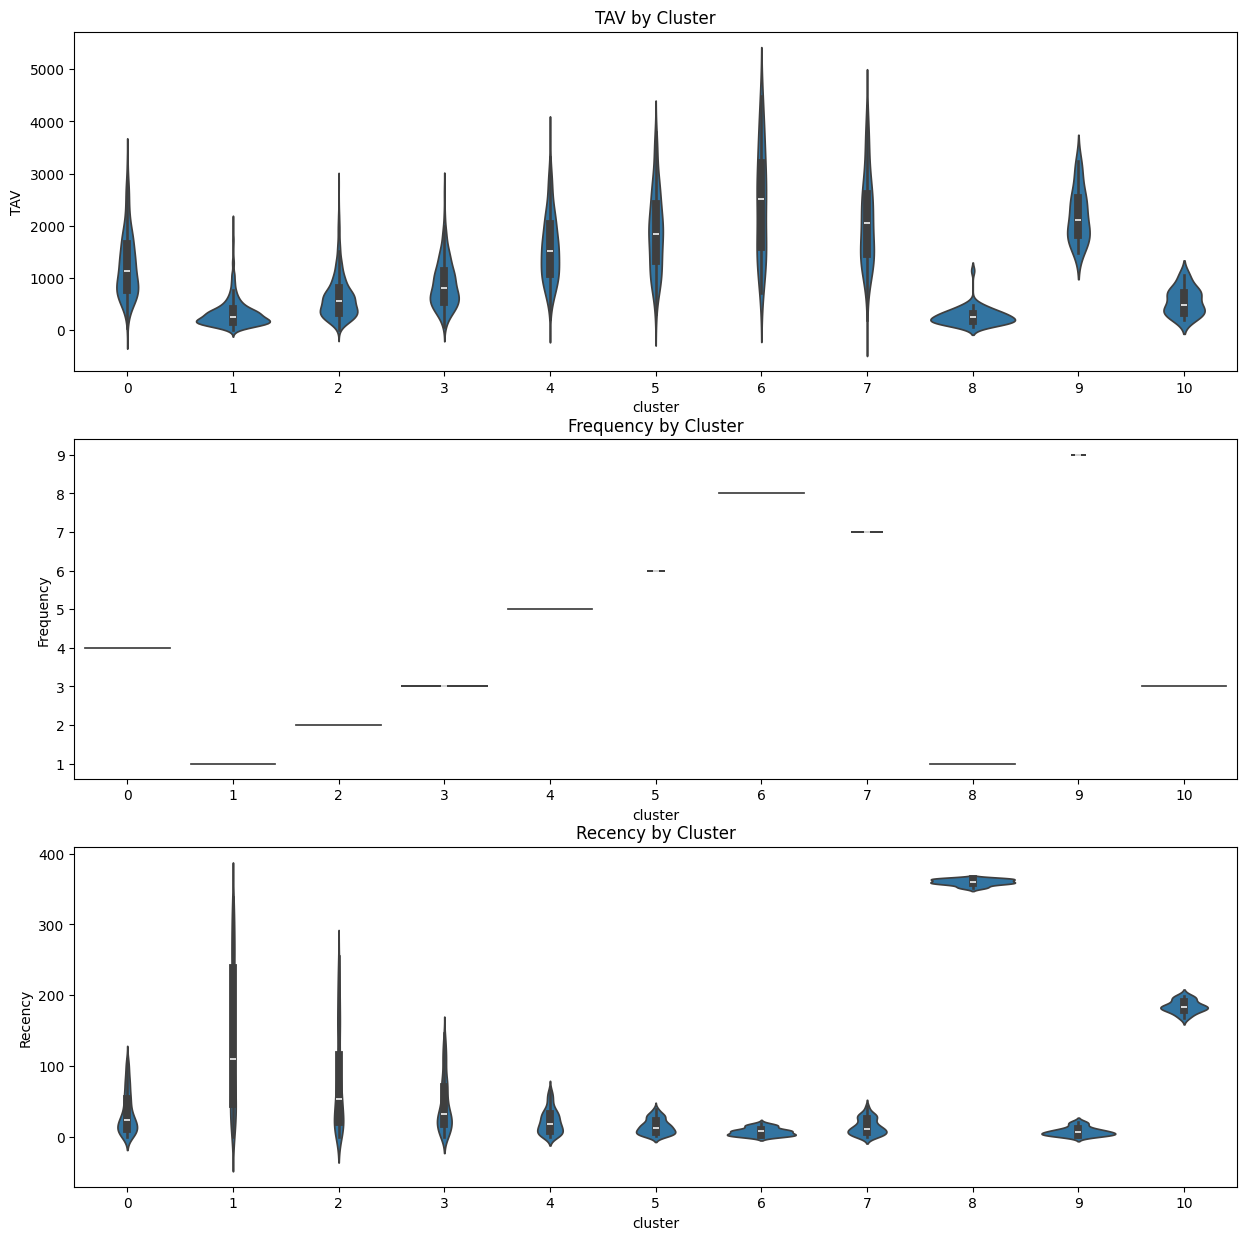

In [13]:
# Remove rows where cluster is -1 (noise points)
df_filtered = df_train[df_train['cluster'] != -1]

plt.figure(figsize=(15, 15))

# TAV by Cluster (excluding -1)
plt.subplot(3, 1, 1)
sns.violinplot(x=df_filtered['cluster'], y=df_filtered['TAV'])
plt.title('TAV by Cluster')
plt.ylabel('TAV')

# Frequency by Cluster (excluding -1)
plt.subplot(3, 1, 2)
sns.violinplot(x=df_filtered['cluster'], y=df_filtered['Frequency'])
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Recency by Cluster (excluding -1)
plt.subplot(3, 1, 3)
sns.violinplot(x=df_filtered['cluster'], y=df_filtered['recency'])
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.show()

Text(0, 0.5, 'Mean TAV')

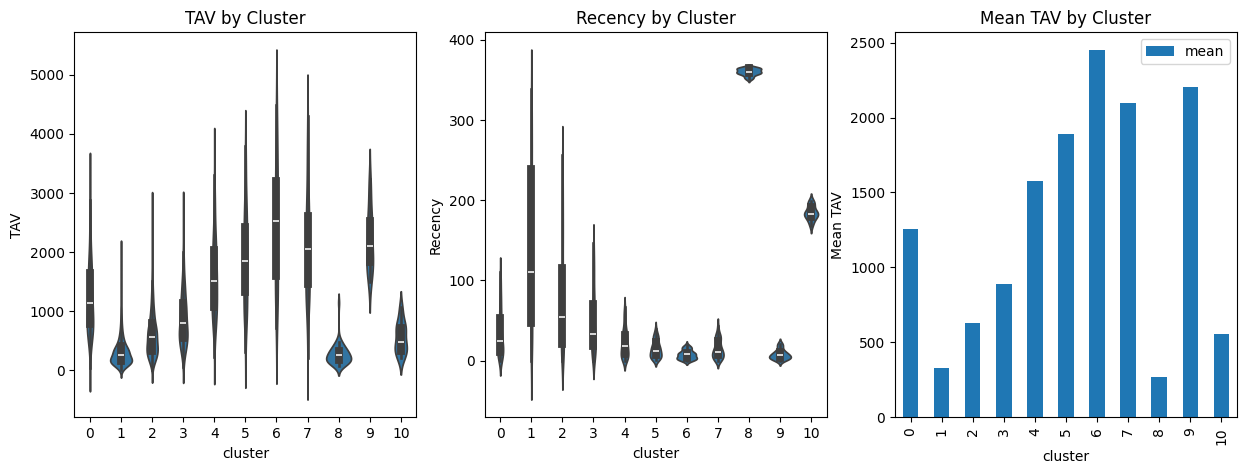

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows where cluster is -1 (noise points)
df_filtered = df_train[df_train['cluster'] != -1]

plt.figure(figsize=(15, 5))

# TAV by Cluster (excluding -1)
plt.subplot(1, 3, 1)
sns.violinplot(x=df_filtered['cluster'], y=df_filtered['TAV'])
plt.title('TAV by Cluster')
plt.ylabel('TAV')

# Recency by Cluster (excluding -1)
plt.subplot(1, 3, 2)
sns.violinplot(x=df_filtered['cluster'], y=df_filtered['recency'])
plt.title('Recency by Cluster')
plt.ylabel('Recency')


# plt.show()
ax = plt.subplot(1, 3, 3)
df_filtered.groupby('cluster')['TAV'].agg(['mean']).plot(kind='bar', ax=ax)
ax.set_title('Mean TAV by Cluster')
ax.set_ylabel('Mean TAV')

In [15]:
# Define the mapping of clusters to categories
cluster_mapping = {
    -1: "Outlier",
    0: "Upsell",
    1: "Reengage",
    2: "Retain",
    3: "Retain",
    4: "Upsell",
    5: "Upsell",
    6: "Reward",
    7: "Reward",
    8: "Reengage",
    9: "Reward",
    10: "Retain"
}

# Apply the mapping to a new column in the dataframe
df_train["category"] = df_train["cluster"].map(cluster_mapping)

# Display the updated dataframe
print(df_train.head())

   CustomerID       TAV  Frequency LastInvoiceDate  recency  cluster  category
0     12346.0  77183.60          1      2011-01-18      325       -1   Outlier
1     12347.0   3598.21          6      2011-12-07        2        5    Upsell
2     12348.0   1797.24          4      2011-09-25       75        0    Upsell
3     12349.0   1757.55          1      2011-11-21       18        1  Reengage
4     12350.0    334.40          1      2011-02-02      310        1  Reengage


In [16]:
all_means = df_train.groupby(df_train["category"].where(df_train["category"] != "Outlier")).agg(
    TAV_Mean=('TAV', 'mean'),
    Freq_Mean=('Frequency', 'mean'),
    Recency_Mean=('recency', 'mean')
).round(2)

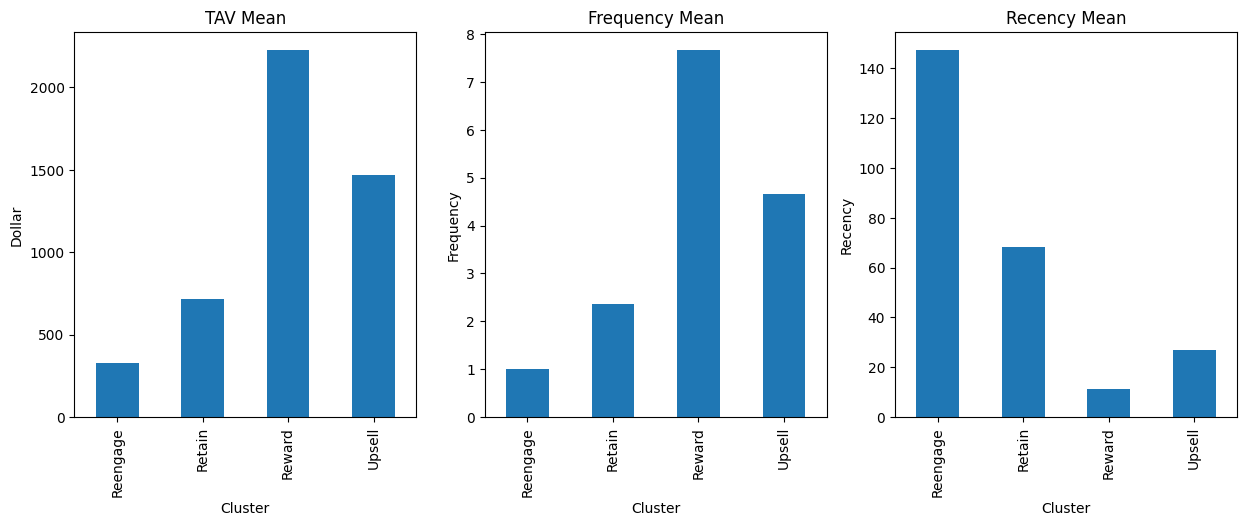

In [17]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1)
all_means['TAV_Mean'].plot(kind='bar', ax=ax)
ax.set_title('TAV Mean')  # Correct way to set the title
ax.set_xlabel('Cluster')
ax.set_ylabel('Dollar')

ax = plt.subplot(1, 3, 2)
all_means['Freq_Mean'].plot(kind='bar', ax=ax)
ax.set_title('Frequency Mean')  # Correct way to set the title
ax.set_xlabel('Cluster')
ax.set_ylabel('Frequency')

ax = plt.subplot(1, 3, 3)
all_means['Recency_Mean'].plot(kind='bar', ax=ax)
ax.set_title('Recency Mean')  # Correct way to set the title
ax.set_xlabel('Cluster')
ax.set_ylabel('Recency');

## __Cluster Recommendation__
* __Re-Engage:__ Customers in this segment made purchases long ago, with low frequency and low annual spending. They are at risk of churning and need a reason to return. Reconnect with them during key events when they may be more likely to make another purchase. Use personalized communication and promotions to reignite their interest.
* __Retention:__ These customers have made recent purchases at a moderate frequency. They are consistent spenders with the potential for long-term loyalty. Strengthen customer engagement by implementing loyalty rewards and personalized incentives.
* __Upsell:__ Customers here have made recent purchases at a moderate frequency and high annual spending. They are engaged but could be encouraged to increase spending per transaction. Offer complementary or premium products to enhance their purchase value. Introduce add-ons or subscriptions to improve their spending habits.
* __Reward:__ These are the most engaged customers, making frequent and recent purchases with the highest annual spend. They represent the brand’s most loyal and valuable customer base. Encourage referrals through bonuses or rewards. Enhance their brand experience with exclusive access or VIP events.
